In [39]:

# %pip install wordcloud
# %pip install praw

In [40]:
shoe_brand = 'Converse'

In [41]:
import pandas as pd
import numpy as np

# misc
import datetime as dt
from pprint import pprint
from itertools import chain

# reddit crawler
import praw

# sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8) # default plot size
import seaborn as sns
sns.set(style='whitegrid', palette='Dark2')
from wordcloud import WordCloud

In [42]:
nltk.download('vader_lexicon') # get lexicons data
nltk.download('punkt') # for tokenizer
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cjong\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cjong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
r = praw.Reddit(client_id='GJtzNYyCMIW-66t_xry24Q',
                     client_secret='ClyB_Id7qbhShlg4P43xqrLiyXPvyA',
                     user_agent='ljx597620034')

In [44]:
subreddit = r.subreddit(shoe_brand)

shoes_subreddit_top_posts = [*subreddit.top(limit=None)] # top posts all time

print(len(shoes_subreddit_top_posts))

999


In [45]:
shoes0 = shoes_subreddit_top_posts[0]

# pprint(vars(news0)) 
print(shoes0.title) # headline
print(shoes0.score) # upvotes
print(shoes0.created) # UNIX timestamps 
print(dt.datetime.fromtimestamp(shoes0.created)) # date and time
print(shoes0.num_comments) # no. of comments
print(shoes0.upvote_ratio) # upvote / total votes
print(shoes0.total_awards_received) # no. of awards given

I’m in too deep
427
1595007114.0
2020-07-17 13:31:54
44
1.0
1


In [46]:
title = [i.title for i in shoes_subreddit_top_posts]
shoes = pd.DataFrame({
    "title": title,
})
shoes.head()

,title
0,I’m in too deep
1,Why choose?
2,Cyberpunk 2077 inspired chucks
3,When I was a kid I loved Elvis and always want...
4,I made these!


In [47]:
sid = SentimentIntensityAnalyzer()

In [48]:
res = [*shoes['title'].apply(sid.polarity_scores)]
pprint(res[:3])

[{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.4939, 'neg': 0.0, 'neu': 0.484, 'pos': 0.516}]


In [49]:
sentiment_df = pd.DataFrame.from_records(res)

shoes = pd.concat([shoes, sentiment_df], axis=1, join='inner')
shoes.head()

,title,neg,neu,pos,compound
0,I’m in too deep,0.0,1.000,0.000,0.0000
1,Why choose?,0.0,1.000,0.000,0.0000
2,Cyberpunk 2077 inspired chucks,0.0,0.484,0.516,0.4939
3,When I was a kid I loved Elvis and always want...,0.0,0.843,0.157,0.5994
4,I made these!,0.0,1.000,0.000,0.0000


In [50]:
THRESHOLD = 0.4

conditions = [
    (shoes['compound'] <= -THRESHOLD),
    (shoes['compound'] > -THRESHOLD) & (shoes['compound'] < THRESHOLD),
    (shoes['compound'] >= THRESHOLD),
    ]

values = ["neg", "neu", "pos"]
shoes['label'] = np.select(conditions, values)

shoes.head()

,title,neg,neu,pos,compound,label
0,I’m in too deep,0.0,1.000,0.000,0.0000,neu
1,Why choose?,0.0,1.000,0.000,0.0000,neu
2,Cyberpunk 2077 inspired chucks,0.0,0.484,0.516,0.4939,pos
3,When I was a kid I loved Elvis and always want...,0.0,0.843,0.157,0.5994,pos
4,I made these!,0.0,1.000,0.000,0.0000,neu


In [51]:
sentence0 = shoes.title.iloc[0]
print(sentence0)
words0 = shoes.title.iloc[0].split()
print(words0)

pos_list, neg_list, neu_list = [], [], []

for word in words0: 
    if (sid.polarity_scores(word)['compound']) >= THRESHOLD:
        pos_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -THRESHOLD:
        neg_list.append(word)
    else:
        neu_list.append(word)                


I’m in too deep
['I’m', 'in', 'too', 'deep']


In [52]:

print('\nPositive:',pos_list)        
print('Neutral:',neu_list)    
print('Negative:',neg_list) 
score = sid.polarity_scores(sentence0)



Positive: []
Neutral: ['I’m', 'in', 'too', 'deep']
Negative: []


In [53]:

print(f"\nThis sentence is {round(score['neg'] * 100, 2)}% negative")
print(f"This sentence is {round(score['neu'] * 100, 2)}% neutral")
print(f"This sentence is {round(score['pos'] * 100, 2)}% positive")



This sentence is 0.0% negative
This sentence is 100.0% neutral
This sentence is 0.0% positive


In [54]:
score

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [55]:
type(score['compound'])

float

In [56]:
type(THRESHOLD)
t1 =score['compound']
t2 =THRESHOLD
t3 = t1 <= t2
t3
# temp = t2<=(t1<={t2})

True

In [57]:

if score['compound'] >= THRESHOLD:
    print(f"The compound value : {score['compound']} >= {THRESHOLD}")
    print(f"\nThis sentence is positive")
elif score['compound'] <= -THRESHOLD:
    print(f"\nThis sentence is negative")
    print(f"The compound value : {score['compound']} <= {-THRESHOLD}")
else:
    print(f"\nThis sentence is neutral")


This sentence is neutral


In [58]:
shoes.label.value_counts()

neu    635
pos    326
neg     38
Name: label, dtype: int64

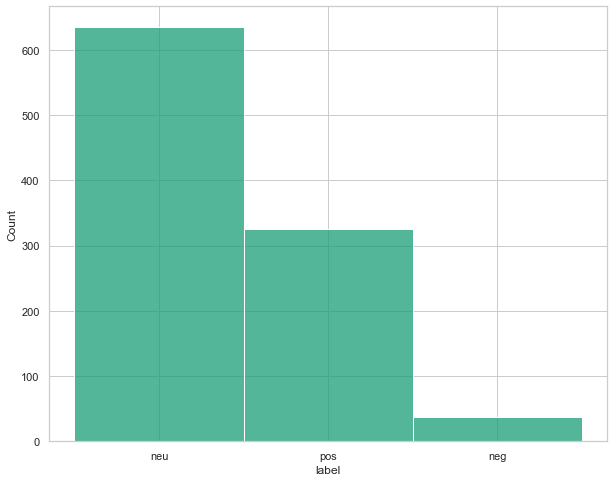

In [59]:
sns.histplot(shoes.label);

In [60]:
def shoes_title_output(df, label):
  res = df[df['label'] == label].title.values
  print(f'{"=" * 20}')
  print("\n".join(title for title in res))

# randomly sample
shoes_sub = shoes.groupby('label').sample(n = 5, random_state = 7)

print("Positive news")
shoes_title_output(shoes_sub, "pos")

print("\nNeutral news")
shoes_title_output(shoes_sub, "neu")

print("\nNegative news")
shoes_title_output(shoes_sub, "neg")

Positive news
Real satisfied with these new unicorn looking shoes 🌈
Love X-High Chucks! Gives me vintage boxing shoe vibes!
Had several pairs of low tops but got my first pair of high tops and already in love
Day 31….Purple High Tops….the best for last …or is it the last
Got these with %50 off on Black Friday. In love with the patch details.

Neutral news
My Extra High Collection!
Current favourites, cactus flower 70s
received my new converses
‘Quilted’ chuck 70s
After almost a year of searching I found some in my size!

Negative news
Your eyes aren’t deceiving you. These really are that green. I need more monochrome pairs!
The only reason Will Smith was able to kill all those robots
Sitting in class, getting an itchy foot.."oh yea, those two weird holes.." genius, Converse.
A gal could have worse problems.
got these bad boys for christmas after looking for them in my size for over a year!!


In [61]:
stop_words = stopwords.words('english')
def custom_tokenize(text): 
  # remove single quote and dashes
    text = text.replace("'", "").replace("-", "").lower()

  # split on words only 
    tk = nltk.tokenize.RegexpTokenizer(r'\w+')  
    tokens = tk.tokenize(text)
    

  # remove stop words
    words = [w for w in tokens if not w in stop_words] 
    return words

In [62]:
def tokens_2_words(df, label):
  # subset titles based on label
    titles = df[df['label'] == label].title
  # apply our custom tokenize function to each title
    tokens = titles.apply(custom_tokenize)
  # join nested lists into a single list
    words = list(chain.from_iterable(tokens))
    return words

pos_words = tokens_2_words(shoes, 'pos')
neg_words = tokens_2_words(shoes, 'neg')

In [63]:
pos_freq = nltk.FreqDist(pos_words)
pos_freq.most_common(20)

[('converse', 67),
 ('love', 67),
 ('pair', 63),
 ('first', 43),
 ('chuck', 38),
 ('new', 37),
 ('got', 35),
 ('chucks', 30),
 ('happy', 28),
 ('day', 26),
 ('today', 24),
 ('like', 23),
 ('70s', 20),
 ('high', 18),
 ('tops', 18),
 ('70', 16),
 ('custom', 15),
 ('pairs', 15),
 ('favorite', 14),
 ('shoes', 13)]

In [64]:
pos_im = [str(p) for p in pos_words] 
pos_str = ",".join(pos_im) 
neg_im = [str(p) for p in neg_words] 
neg_str = ",".join(neg_im)

<function matplotlib.pyplot.show(close=None, block=None)>

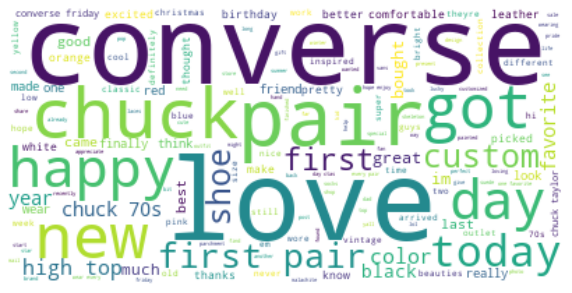

In [65]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud_pos = WordCloud(background_color = "white").generate(pos_str)
word_cloud_neg = WordCloud().generate(neg_str)
plt.imshow(word_cloud_pos,interpolation = "bilinear") 
plt.axis("off") 
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

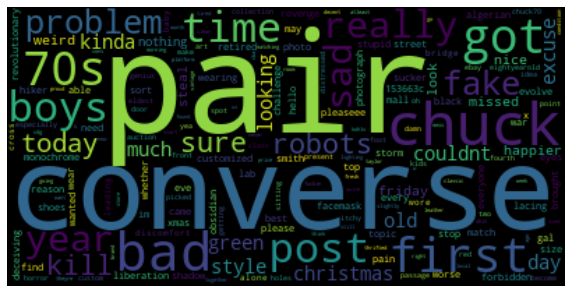

In [66]:
plt.imshow(word_cloud_neg,interpolation = "bilinear") 
plt.axis("off") 
plt.show